In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Epoch: 0, MSE : 0.489081
Epoch: 0, MSE : 0.487637
Epoch: 0, MSE : 0.487894
Epoch: 0, MSE : 0.487886
Epoch: 1, MSE : 0.484843
Epoch: 1, MSE : 0.482360
Epoch: 1, MSE : 0.482041
Epoch: 1, MSE : 0.482042
Epoch: 2, MSE : 0.481264
Epoch: 2, MSE : 0.477439
Epoch: 2, MSE : 0.476727
Epoch: 2, MSE : 0.476733
Epoch: 3, MSE : 0.476866
Epoch: 3, MSE : 0.470815
Epoch: 3, MSE : 0.469668
Epoch: 3, MSE : 0.469681
Epoch: 4, MSE : 0.470416
Epoch: 4, MSE : 0.460229
Epoch: 4, MSE : 0.458408
Epoch: 4, MSE : 0.458437
Epoch: 5, MSE : 0.459907
Epoch: 5, MSE : 0.441398
Epoch: 5, MSE : 0.438310
Epoch: 5, MSE : 0.438396
Epoch: 6, MSE : 0.441246
Epoch: 6, MSE : 0.405166
Epoch: 6, MSE : 0.399527
Epoch: 6, MSE : 0.399841
Epoch: 7, MSE : 0.405653
Epoch: 7, MSE : 0.338730
Epoch: 7, MSE : 0.329086
Epoch: 7, MSE : 0.329987
Epoch: 8, MSE : 0.339581
Epoch: 8, MSE : 0.265516
Epoch: 8, MSE : 0.253222
Epoch: 8, MSE : 0.252064
Epoch: 9, MSE : 0.259716
Epoch: 9, MSE : 0.228023
Epoch: 9, MSE : 0.206275
Epoch: 9, MSE : 0.206415


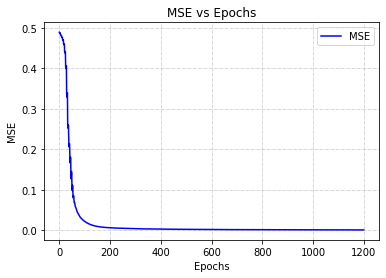

In [5]:
class Layer:
    def __init__(self, input, neurons, activation):
        
        self.weights = np.random.randn(input, neurons)
        self.bias = np.random.randn(neurons)
        self.activation = activation
        self.last_activation = None
        self.error = None
        self.delta = None
        
    def compute_activation(self, x):
        r = np.dot(x, self.weights) + self.bias
        self.last_activation = self.apply_activation(r)
        return self.last_activation
    
    def apply_activation(self, r):
        
        if self.activation == 'relu':
            return r * (r > 0)
        
        if self.activation == 'tanh':
            return np.tanh(r)
        
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        
        return r
    
    def derivative(self, r):
        if self.activation == 'relu':
            return 1 * (r > 0)
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        
        return r
    
class NeuralNetwork:
    
    def __init__(self):
        self._layers = []
        
    def add_layer(self, layer):
        self._layers.append(layer)
        
    def forward_pass(self, X):
        for layer in self._layers:
            X = layer.compute_activation(X)
            
        return X
    
    def mse(self, X, y):
        return np.mean(np.square(y - nn.forward_pass(X)))
    
    def update_weights(self, X, lr):
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.delta * input_to_use.T * lr
            
    def backpropagation(self, X, y):
        output = self.forward_pass(X)
        
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            
            if layer == self._layers[-1]:
                layer.error = y - output
                layer.delta = layer.error * layer.derivative(output)
            else:
                next_layer = self._layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.derivative(layer.last_activation)
                
    
    def train(self, X, y, lr, max_epochs):
        total_error = []
        
        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j],y[j])
                self.update_weights(X[j],lr)
                error = self.mse(X, y)
                total_error.append(error)
                print('Epoch: %s, MSE : %f'%(i, float(error)))
                
        return total_error
    
    def report(self, X, y):
        y_pred = self.forward_pass(X)[:,0].T
        y_true = y.flatten()
        print('Accuracy : %2f%%'%(((np.round(y_pred, 1)== y_true)).mean() * 100))
        print('Target: \n' + str(y))
        print('Predicted output: \n' + str(self.forward_pass(X)))
        
    def plot_graph(self, errors):
        plt.plot(errors, c = 'b', label = 'MSE')
        plt.title('MSE vs Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('MSE')
        plt.grid(linestyle='-.',linewidth=0.5)
        plt.legend()
        plt.show()
        
if __name__=='__main__':
    np.random.seed(100)
    nn = NeuralNetwork()
    nn.add_layer(Layer(2, 20,'tanh'))
    nn.add_layer(Layer(20, 10, 'tanh'))
    nn.add_layer(Layer(10, 1,'sigmoid'))
    
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[0],[1],[1],[0]])
    
    errors = nn.train(X, y, lr = 0.75, max_epochs = 300)
    nn.report(X, y)
    nn.plot_graph(errors)